<a href="https://colab.research.google.com/github/muratcanaydogdu21/Insurance/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
from sklearn import metrics



In [ ]:
data=pd.read_csv("insurance.csv")
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


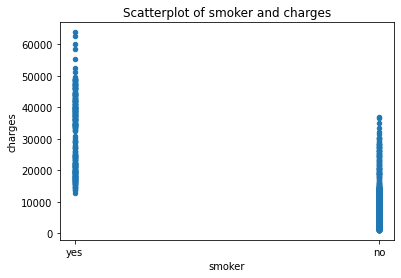

In [ ]:
data.plot.scatter(x='smoker', y='charges', title='Scatterplot of smoker and charges');
#sns.stripplot(data['charges'], data['smoker'])

#verilere baktığımızda sigara tüketmek ve suç oranaında bir bağlantı olduğnu görüyoruz.daha düşük suç oranlarında daha sigara tüketimi yok iken suç oranı arttıkça sigara tüketimi de artıyor.


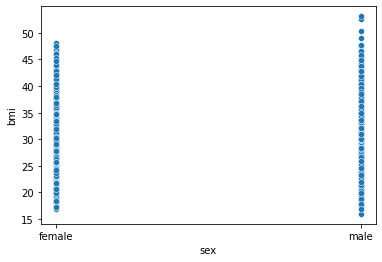

In [ ]:
sns.scatterplot(y=data['bmi'], x=data['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


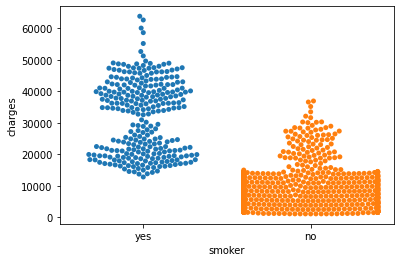

In [ ]:
sns.swarmplot(x=data['smoker'],
              y=data['charges'])

Text(0, 0.5, 'BMİ')

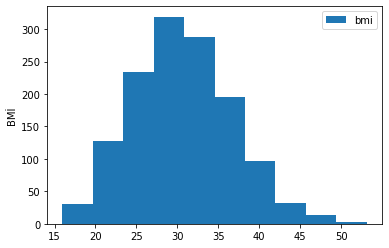

In [ ]:
data.plot.hist(x="age",y="bmi")
plt.ylabel("BMİ")

Text(0, 0.5, 'BMİ')

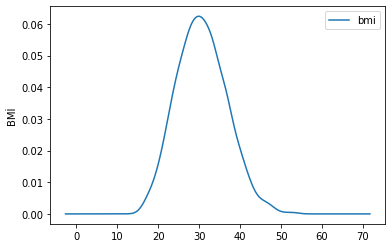

In [ ]:
data.plot.density(x="age",y="bmi")
plt.ylabel("BMİ")

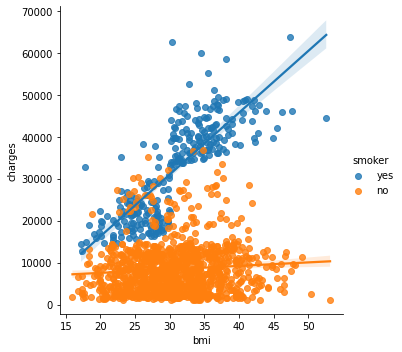

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data)

<BarContainer object of 1338 artists>

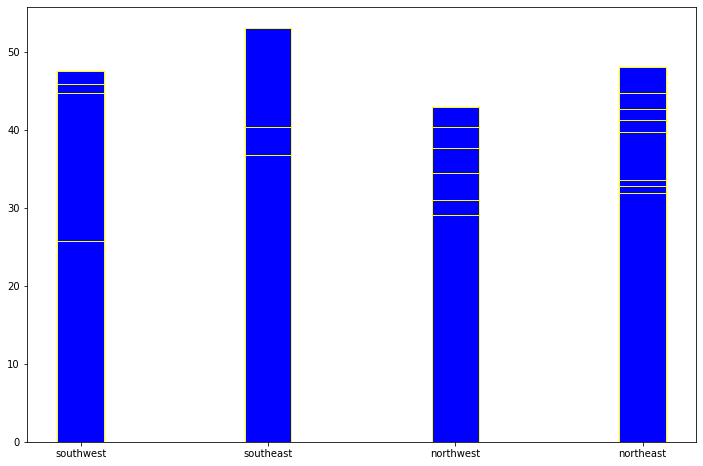

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
br1=data["region"]

br2=data["bmi"]
br3=data["smoker"]
plt.bar(br1, br2,color ='b', width = barWidth,
        edgecolor ='yellow', label ='IT')


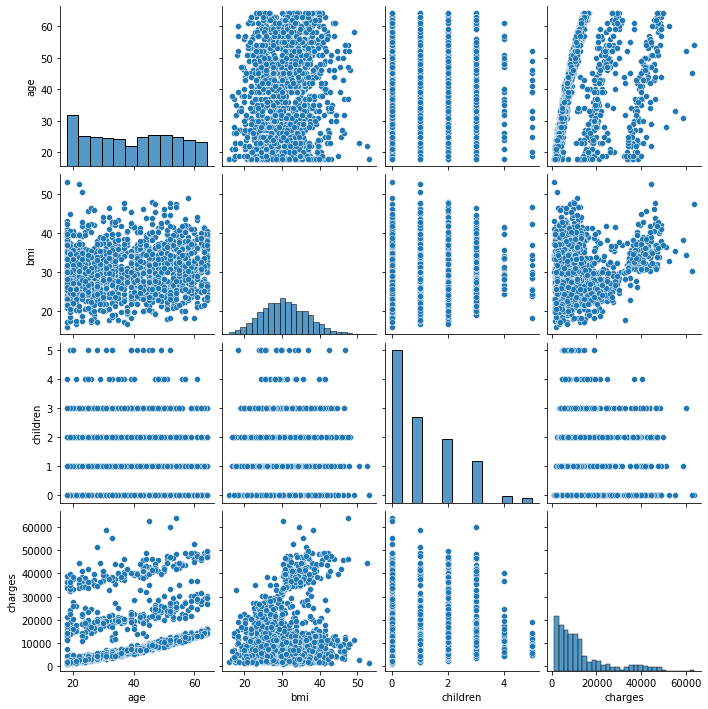

In [ ]:
sns.pairplot(data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


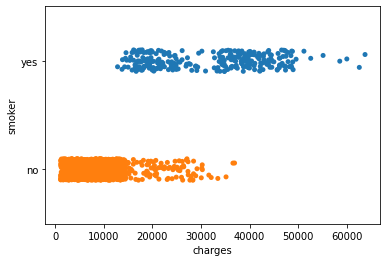

In [ ]:
sns.stripplot(data['charges'], data['smoker'])



Text(0.5, 1.0, 'Overall distribution of charges comparing smokers and non-smokers')

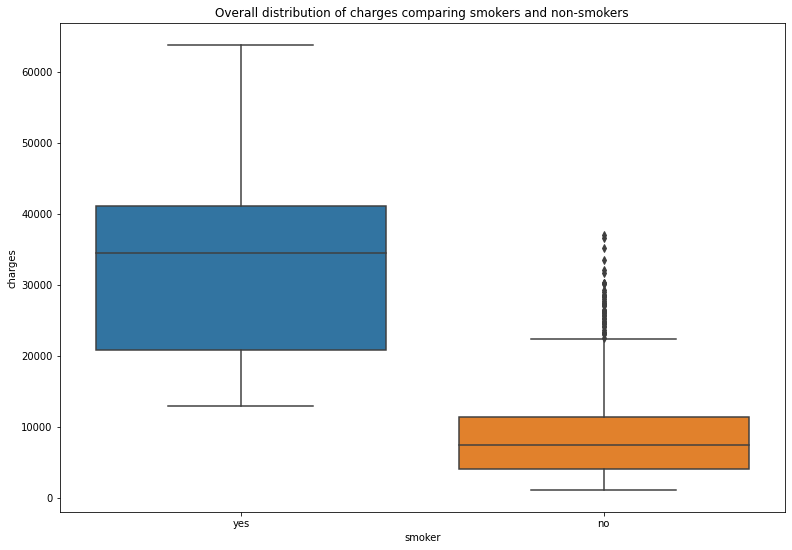

In [ ]:
plt.figure(figsize=(13,9))
sns.boxplot(x='smoker',y='charges',data=data)
plt.title("Overall distribution of charges comparing smokers and non-smokers")

In [ ]:
classes=data["smoker"].value_counts()
classes

no     1064
yes     274
Name: smoker, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

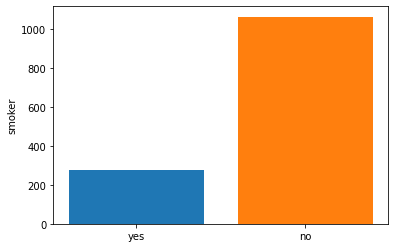

In [ ]:
plt.bar("yes",classes["yes"])
plt.bar("no",classes["no"])
plt.ylabel("smoker")
plt.show

In [ ]:
classes=data["region"].value_counts()
classes

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

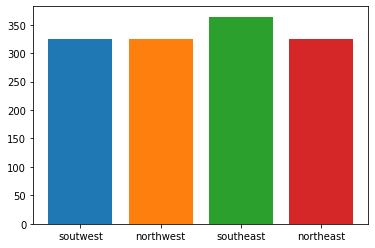

In [ ]:
plt.bar("soutwest",classes["southwest"])
plt.bar("northwest",classes["northwest"])
plt.bar("southeast",classes["southeast"])
plt.bar("northeast",classes["northeast"])

plt.show

Text(0.5, 1.0, 'Bölgelere göre charges')

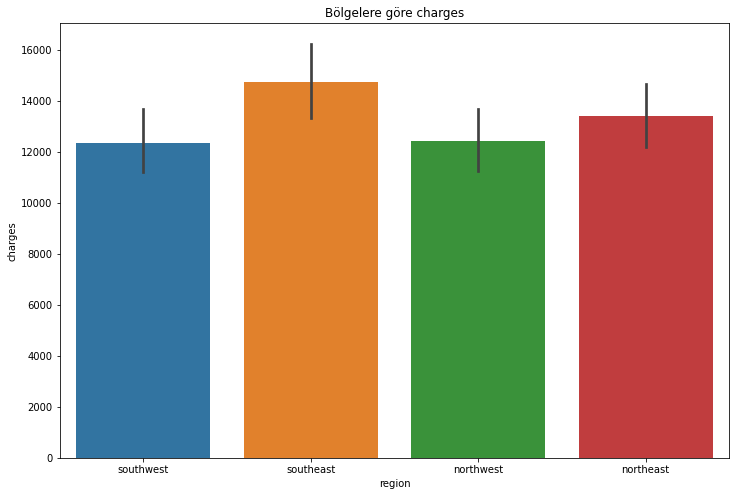

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = "region", y = "charges", data = data)
plt.title("Bölgelere göre charges")

Text(0.5, 1.0, 'Bölgelere göre çocuk dağılımı')

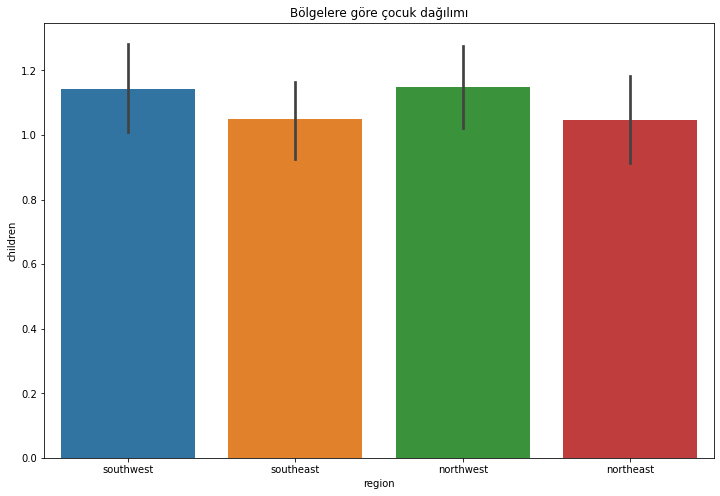

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = "region", y = "children", data = data)
plt.title("Bölgelere göre çocuk dağılımı")

Text(0.5, 1.0, 'BMİ vs Children')

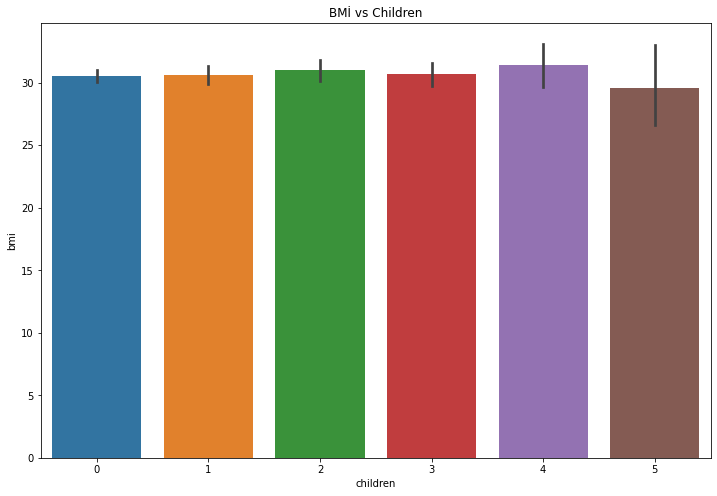

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = "children", y = "bmi", data = data)
plt.title("BMİ vs Children")

Text(0.5, 1.0, 'BMİ vs Charges')

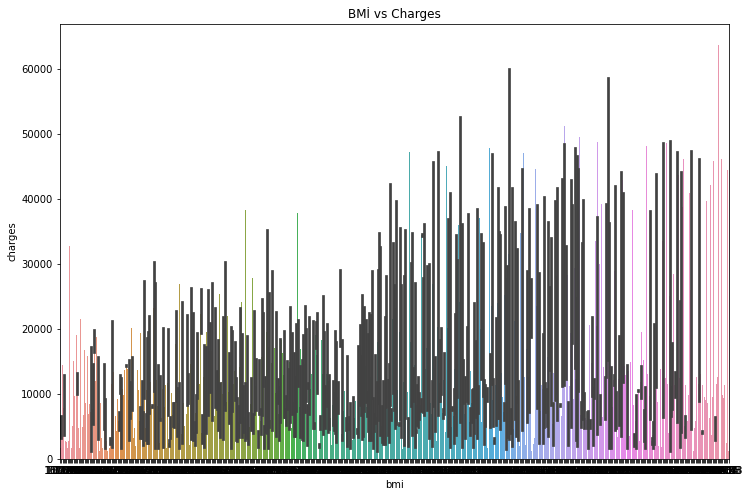

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = "bmi", y = "charges", data = data)
plt.title("BMİ vs Charges")

Vücüt kutle endeksi arttıkça suçlamalarda da bir artış söz konusu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

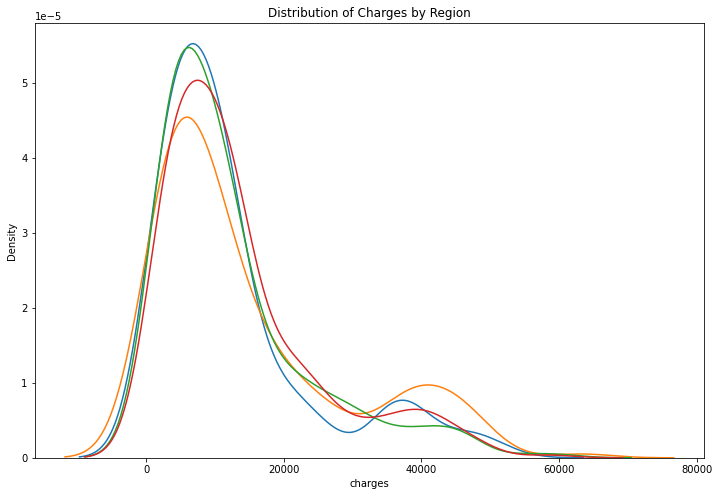

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Charges by Region")
for i in data['region'].unique():
    sns.distplot(data[(data['region']==i)]['charges'], hist=False, kde=True, label=i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, ridge_regression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
x=data.loc[:,["age","region","charges","bmi"]]
y=data.loc[:,"sex"]

In [ ]:
encoder=LabelEncoder()
for i in x.columns:
    x[i]=encoder.fit_transform(x[i])
    y=encoder.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
logistic_classfier_model=LogisticRegression()
ridge_classifier_model=RidgeClassifier()
decision_tree_model =DecisionTreeClassifier()
naive_beyes_model=GaussianNB()
neural_network_model=MLPClassifier()

In [ ]:
logistic_classfier_model.fit(x_train,y_train)
ridge_classifier_model.fit(x_train,y_train)
decision_tree_model.fit(x_train,y_train)
naive_beyes_model.fit(x_train,y_train)
neural_network_model.fit(x_train,y_train)


MLPClassifier()

In [ ]:
logistic_pred=logistic_classfier_model.predict(x_test)
ridge_pred=ridge_classifier_model.predict(x_test)
tree_pred=decision_tree_model.predict(x_test)
naive_beyes_pred=naive_beyes_model.predict(x_test)
neural_network_pred=neural_network_model.predict(x_test)

In [ ]:
logistic_report=classification_report(y_test,logistic_pred)
ridge_report=classification_report(y_test,ridge_pred)
tree_report=classification_report(y_test,tree_pred)
naive_beyes_report=classification_report(y_test,naive_beyes_pred)
neural_network_report=classification_report(y_test,neural_network_pred)

In [ ]:
print("***logistic regression***")
print(logistic_report)
print("***ridge Report***")
print(ridge_report)
print("***tree report***")
print(tree_report)
print("***naive beyes report***")
print(naive_beyes_report)
print("*** neural networks raport")
print(neural_network_report)

***logistic regression***
              precision    recall  f1-score   support

           0       0.55      0.22      0.32       207
           1       0.50      0.81      0.61       195

    accuracy                           0.51       402
   macro avg       0.52      0.52      0.47       402
weighted avg       0.53      0.51      0.46       402

***ridge Report***
              precision    recall  f1-score   support

           0       0.55      0.29      0.38       207
           1       0.50      0.75      0.60       195

    accuracy                           0.51       402
   macro avg       0.53      0.52      0.49       402
weighted avg       0.53      0.51      0.49       402

***tree report***
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       207
           1       0.58      0.62      0.60       195

    accuracy                           0.60       402
   macro avg       0.60      0.60      0.60       402
weighted av

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['smoker', 'sex'])
print(one_hot_encoded_data)


      age     bmi  children     region      charges  smoker_no  smoker_yes  \
0      19  27.900         0  southwest  16884.92400          0           1   
1      18  33.770         1  southeast   1725.55230          1           0   
2      28  33.000         3  southeast   4449.46200          1           0   
3      33  22.705         0  northwest  21984.47061          1           0   
4      32  28.880         0  northwest   3866.85520          1           0   
...   ...     ...       ...        ...          ...        ...         ...   
1333   50  30.970         3  northwest  10600.54830          1           0   
1334   18  31.920         0  northeast   2205.98080          1           0   
1335   18  36.850         0  southeast   1629.83350          1           0   
1336   21  25.800         0  southwest   2007.94500          1           0   
1337   61  29.070         0  northwest  29141.36030          0           1   

      sex_female  sex_male  
0              1         0  
1    

In [ ]:
from sklearn.preprocessing import OneHotEncoder
 

data = pd.read_csv('insurance.csv')
 

data['smoker']=data['smoker'].astype('category')
data['sex']=data['sex'].astype('category')
 
 
data['smoker_new']=data["smoker"].cat.codes
data['sex_new']=data['sex'].cat.codes
 
 

enc=OneHotEncoder()
 


enc_data=pd.DataFrame(enc.fit_transform(data[['smoker_new','sex_new']]).toarray())

New_df=data.join(enc_data)
 
print(New_df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_new  sex_new    0    1    2    3  
0              1        0  0.0  1.0  1.0  0.0  
1              0        1  1.0  0.0  0.0  1.0  
2              

In [ ]:

one_hot_encoded_data = pd.get_dummies(data, columns = ['Gender','Remarks'])
print(one_hot_encoded_data)

KeyError: ignored

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
def scoreResults(model, x_train, x_test, y_train, y_test):

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    mse_train = metrics.mean_squared_error(y_train, y_train_predict)
    mse_test = metrics.mean_squared_error(y_test, y_test_predict)

    return [r2_train, r2_test, mse_train, mse_test]

In [ ]:
result_lr = scoreResults(model = lr, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

print(f"Train R2 Score: {result_lr[0]:.4f} MSE: {result_lr[2]:.4f}")
print(f"Test R2 Score: {result_lr[1]:9.4f} MSE: {result_lr[3]:.4f}")


Train R2 Score: 0.0022 MSE: 0.2493
Test R2 Score:    0.0014 MSE: 0.2494


en iyi performans gösteren R2

In [ ]:
X = data.drop('charges',axis=1)
y = data['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators = 100, random_state = 20)
randomforest.fit(x_train,y_train)

RandomForestRegressor(random_state=20)

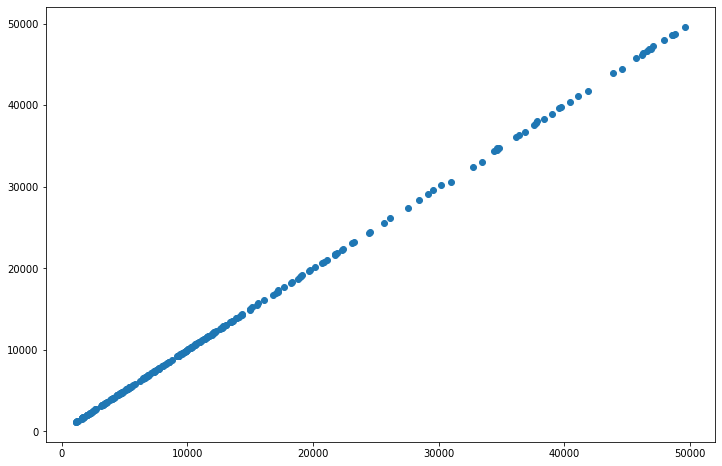

In [ ]:
predictions = randomforest.predict(x_test)
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test_data: ', round(r2_score(y_test,predictions), 2))


MAE: 30.673765634702235
MSE: 3726.935910941587
RMSE: 61.04863561900124
R2 test_data:  1.0


Text(0.5, 1.0, 'Cross-validated Prediction accuracy of Charges')

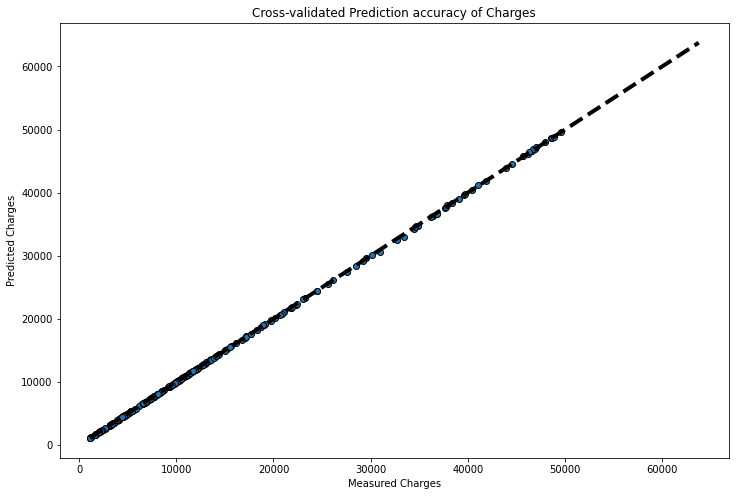

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, predictions, edgecolors=(0,0,0))
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel("Measured Charges")
plt.ylabel("Predicted Charges")
plt.title("Cross-validated Prediction accuracy of Charges")
